In [32]:
import keras
from keras.datasets import mnist

In [56]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [57]:
train_images.shape

(60000, 28, 28)

In [58]:
len(train_images)

60000

In [59]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [60]:
test_images.shape

(10000, 28, 28)

In [61]:
len(test_images)

10000

In [62]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [63]:
from keras import models
from keras import layers

In [64]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation = 'relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(10, activation = 'softmax'))
network.summary()
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                36928     
__________

In [65]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [66]:
train_images = train_images.reshape((60000, 28, 28,1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28,1))
test_images = test_images.astype('float32')/255

In [67]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
network.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.1740 - acc: 0.9448
Epoch 2/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0470 - acc: 0.9860
Epoch 3/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0320 - acc: 0.9902
Epoch 4/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0241 - acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0199 - acc: 0.9939


In [14]:
from matplotlib import pyplot as plt

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

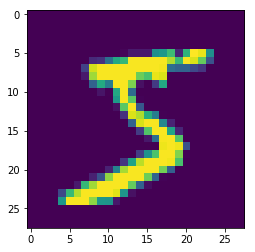

In [15]:
plt.imshow(train_images[0].reshape(28,28))
train_labels[0]

In [16]:
result = network.predict(test_images)

array([2.1943656e-07, 2.0947499e-10, 5.0299013e-06, 1.0094726e-08,
       9.9928904e-01, 4.4438362e-08, 5.0657678e-07, 9.8305964e-06,
       8.3285909e-07, 6.9444487e-04], dtype=float32)

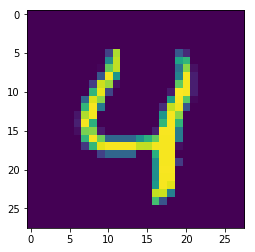

In [17]:
plt.imshow(test_images[4].reshape(28,28))
result[4]